# Artificial Neural Networks and Deep Learning

---

## Homework 1: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.
2. Upload the `training_set.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.zip` file to Codabench.


## 🌐 Connect Colab to Google Drive

In [1]:
#from google.colab import drive

#drive.mount('/gdrive')
#%cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 1

## ⚙️ Import Libraries

In [2]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl


# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from PIL import Image
import matplotlib.gridspec as gridspec

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

E0000 00:00:1731359560.595563   30031 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731359560.598205   30031 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.18.0


## ⏳ Load the Data

In [3]:
data = np.load('training_set.npz')

images = data["images"]
labels = data["labels"]



X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize data to the range [0, 1]
X_train = (X_train / 255).astype('float32')
X_test = (X_test / 255).astype('float32')

# Convert labels to categorical format using one-hot encoding
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)



## ⏳ Inspect Data

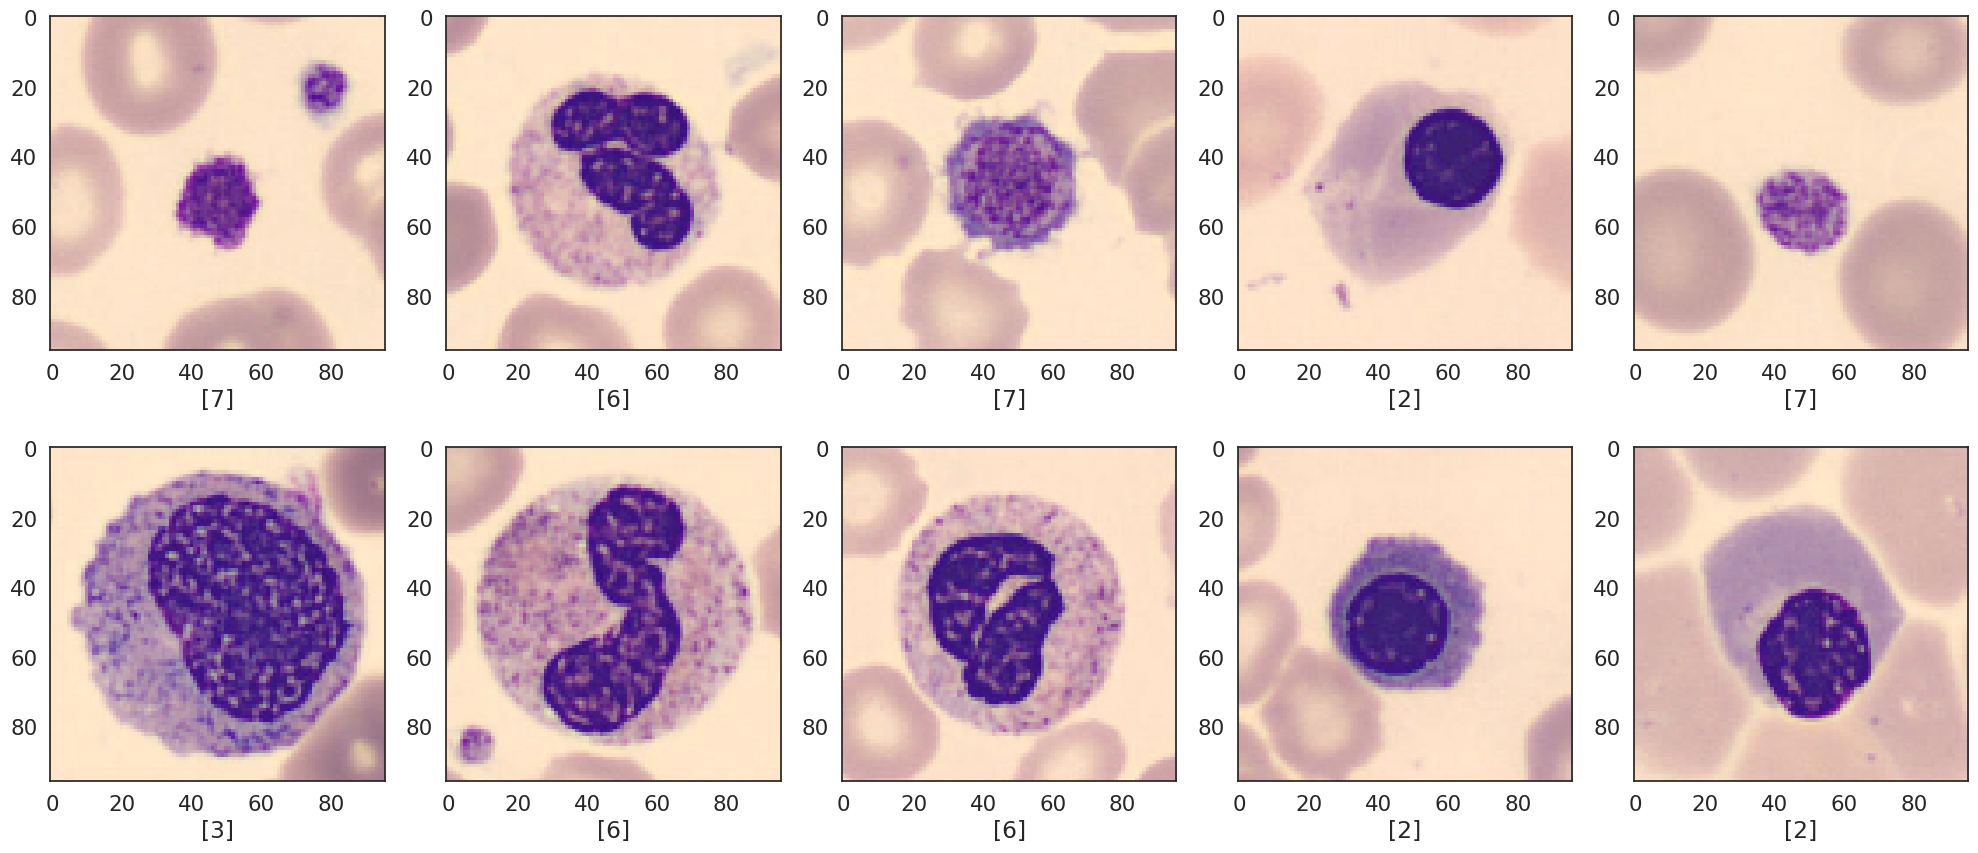

In [4]:
# Number of images to display
num_img = 10

# Create subplots for displaying items
fig, axes = plt.subplots(2, num_img//2, figsize=(20, 9))
for i in range(num_img):
    ax = axes[i%2, i%num_img//2]
    ax.imshow(np.clip(images[i], 0, 255))  # Display clipped item images
    ax.set_xlabel(labels[i])
plt.tight_layout()

plt.show()

## 🧮 Define Network Parameters

In [5]:
# Number of training epochs
epochs = 1000

# Batch size for training
batch_size = 32

# Learning rate: step size for updating the model's weights
learning_rate = 0.001

## 🛠️ Define the Model

I0000 00:00:1731359564.700934   30031 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13512 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ Input (InputLayer)          │ (None, 96, 96, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv0 (Conv2D)              │ (None, 96, 96, 16)    │        448 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ relu0 (ReLU)                │ (None, 96, 96, 16)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ mp0 (MaxPooling2D)          │ (None, 48, 48, 16)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1 (Conv2D)              │ (None, 48, 48, 32)    │      4,640 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ relu1 (ReLU)                │ (None, 48, 48, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ mp1 (MaxPooling2D)          │ (None, 24, 24, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2 (Conv2D)              │ (None, 24, 24, 64)    │     18,496 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ relu2 (ReLU)                │ (None, 24, 24, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ mp2 (MaxPooling2D)          │ (None, 12, 12, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv3 (Conv2D)              │ (None, 12, 12, 128)   │     73,856 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ relu3 (ReLU)                │ (None, 12, 12, 128)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten (Flatten)           │ (None, 18432)         │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Output (Dense)              │ (None, 8)             │    147,464 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 244,904 (956.66 KB)

 Trainable params: 244,904 (956.66 KB)

 Non-trainable params: 0 (0.00 B)

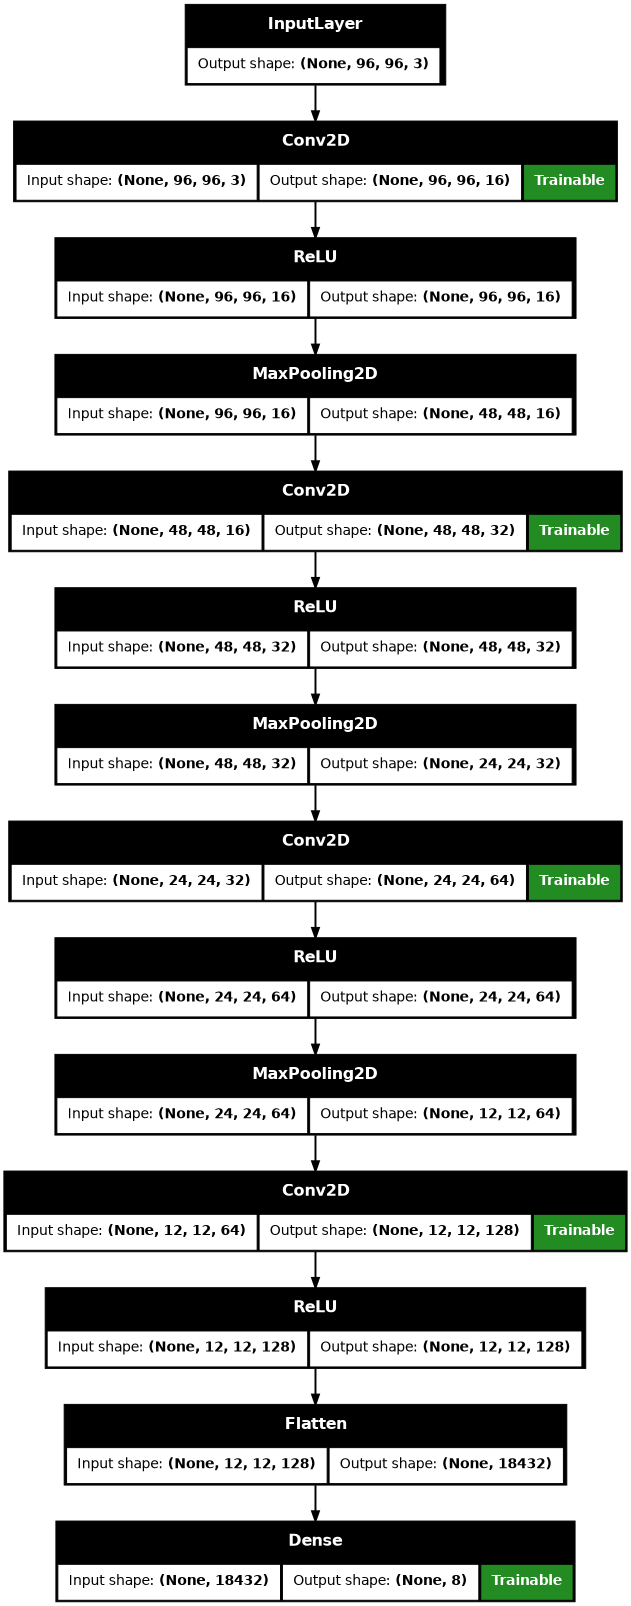

In [ ]:
def build_model(
    input_shape=(96,96,3),
    output_shape=8,
    learning_rate=learning_rate,
    augmentation=None,
    seed=seed
):
    # Set the random seed for reproducibility
    tf.random.set_seed(seed)

    # Define the input layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Apply optional data augmentation, then first convolutional layer
    if augmentation is None:
        x = tfkl.Conv2D(filters=32, kernel_size=3, padding='same', name='conv0')(input_layer)
    else:
        x = augmentation(input_layer)
        x = tfkl.Conv2D(filters=32, kernel_size=3, padding='same', name='conv0')(x)

    # First block: convolution, batch normalization, activation, pooling
    x = tfkl.BatchNormalization(name='bn0')(x)
    x = tfkl.ReLU(name='relu0')(x)
    x = tfkl.MaxPooling2D(name='mp0')(x)

    # Second block with increased filters
    x = tfkl.Conv2D(filters=64, kernel_size=3, padding='same', name='conv1')(x)
    x = tfkl.BatchNormalization(name='bn1')(x)
    x = tfkl.ReLU(name='relu1')(x)
    x = tfkl.MaxPooling2D(name='mp1')(x)

    # Third block with further increased filters
    x = tfkl.Conv2D(filters=128, kernel_size=3, padding='same', name='conv2')(x)
    x = tfkl.BatchNormalization(name='bn2')(x)
    x = tfkl.ReLU(name='relu2')(x)
    x = tfkl.MaxPooling2D(name='mp2')(x)

    # Fourth block with even more filters
    x = tfkl.Conv2D(filters=256, kernel_size=3, padding='same', name='conv3')(x)
    x = tfkl.BatchNormalization(name='bn3')(x)
    x = tfkl.ReLU(name='relu3')(x)
    x = tfkl.MaxPooling2D(name='mp3')(x)

    # Fifth block with maximum filters and global pooling instead of flatten
    x = tfkl.Conv2D(filters=512, kernel_size=3, padding='same', name='conv4')(x)
    x = tfkl.BatchNormalization(name='bn4')(x)
    x = tfkl.ReLU(name='relu4')(x)
    x = tfkl.GlobalAveragePooling2D(name='gap')(x)  # Global pooling instead of Flatten

    # Dense layer before the output layer
    x = tfkl.Dense(256, activation='relu', name='fc1')(x)

    # Define the output layer with softmax activation for classification
    output_layer = tfkl.Dense(units=output_shape, activation='softmax', name='Output')(x)

    # Create the model
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='Complex_CNN')

    # Compile the model with categorical crossentropy loss and Adam optimizer
    loss = tfk.losses.CategoricalCrossentropy()
    optimizer = tfk.optimizers.Adam(learning_rate)
    metrics = ['accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the compiled model
    return model

# Build the model with specified input and output shapes
model = build_model()

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)


## 🧠 Train the Model

In [7]:
# Define the patience value for early stopping
patience = 100

# Create an EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    restore_best_weights=True
)

# Store the callback in a list
callbacks = [early_stopping]

In [8]:
# Train the model with early stopping callback
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=callbacks
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'CNN_'+str(final_val_accuracy)+'.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

Epoch 1/1000


I0000 00:00:1731359566.713207   30192 service.cc:148] XLA service 0x7f4e88002780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731359566.713239   30192 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4090 Laptop GPU, Compute Capability 8.9
I0000 00:00:1731359566.804926   30192 cuda_dnn.cc:529] Loaded cuDNN version 90501


 87/344 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3079 - loss: 1.8231

I0000 00:00:1731359568.077206   30192 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


344/344 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4942 - loss: 1.3762 - val_accuracy: 0.7518 - val_loss: 0.7019
Epoch 2/1000
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7762 - loss: 0.5990 - val_accuracy: 0.7903 - val_loss: 0.5433
Epoch 3/1000
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8163 - loss: 0.4837 - val_accuracy: 0.8136 - val_loss: 0.4912
Epoch 4/1000
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8378 - loss: 0.4217 - val_accuracy: 0.8176 - val_loss: 0.4770
Epoch 5/1000
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8514 - loss: 0.3816 - val_accuracy: 0.8187 - val_loss: 0.4840
Epoch 6/1000
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8606 - loss: 0.3573 - val_accuracy: 0.8252 - val_loss: 0.4601
Epoch 7/1000
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8657 - loss: 0.3362 - val_accuracy: 0.8165 - val_loss: 0.5411
Epoch 8/1000
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8702 - loss: 0.3183 - val_accuracy:

## Plot

89.74
87.43


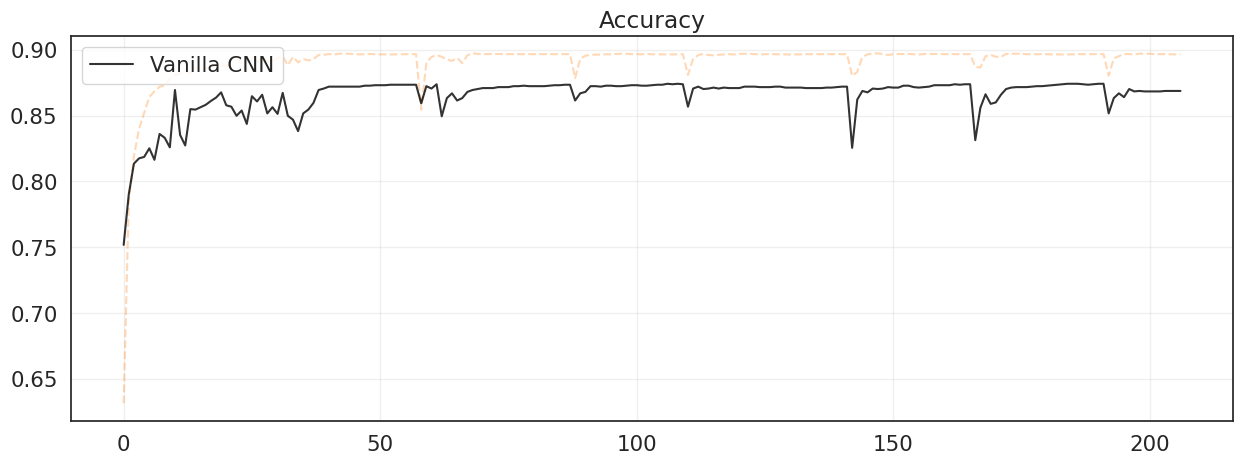

In [24]:
plt.figure(figsize=(15,5))
plt.plot(history['accuracy'], alpha=.3, color='#ff7f0e', linestyle='--')
plt.plot(history['val_accuracy'], label='Vanilla CNN', alpha=.8, color='#000000')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

print(round(max(history['accuracy'])* 100, 2))
print(round(max(history['val_accuracy'])* 100, 2))

plt.show()

## 📊 Prepare Your Submission

To prepare your submission, create a `.zip` file that includes all the necessary code to run your model. It **must** include a `model.py` file with the following class:

```python
# file: model.py
class Model:
    def __init__(self):
        """Initialize the internal state of the model."""

    def predict(self, X):
        """Return a numpy array with the labels corresponding to the input X."""
```

The next cell shows an example implementation of the `model.py` file, which includes loading model weights from the `weights.keras` file and conducting predictions on provided input data. The `.zip` file is created and downloaded in the last notebook cell.

❗ Feel free to modify the method implementations to better fit your specific requirements, but please ensure that the class name and method interfaces remain unchanged.

In [9]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl


class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('weights.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

Writing model.py


In [10]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
!zip {filename} model.py weights.keras

from google.colab import files
files.download(filename)

/bin/bash: line 1: zip: command not found


ModuleNotFoundError: No module named 'google.colab'